In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# считываем данные из файла и преобразуем их в двумерный массив
def read_data(filename):
    import sys
    with open(f'{filename}.txt', 'r') as sys.stdin:
        inp_data = np.array(np.matrix('; '.join(list(map(str.strip, sys.stdin.readlines())))))
        return inp_data

In [3]:
# нормализация
def norming(data):
    a_n = []
    b_n = []
    for n in range(len(data[0])):
        max_n, min_n = max(data[:, n]), min(data[:, n])
        k, b = 1 / (max_n - min_n), -min_n / (max_n - min_n)
        for m in range(len(data)):
            data[m, n] *= k
            data[m, n] += b
        a_n.append(k)
        b_n.append(b)

    return data, a_n, b_n, # запоминаем коэф. для денормировки 

In [4]:
# функция поиска ближайшего нейрона  
def findBMU(w_k, x):
    return min([ (np.linalg.norm(x - w), i)  for i, w in enumerate(w_k) ])[1]

In [5]:
# обучение сети Кохонена с рекомендуемыми параметрами
def Kohonen_learn(K, data, lamb = 0.3, delta_lamb = 0.05, L = 10):
    w_k = [] # веса

    # инициализация весов случайными значениями из [0.1, 0.3] 
    for _ in range(K):
        w_k.append(np.random.uniform(0.1, 0.30001, size=len(data[0])))
    
    # пока скорость ненулевая
    while lamb > 0:
        for _ in range(L):
            for x in data:
                ind = findBMU(w_k, x) # для каждого вектора из выборки находим ближайший нейрон
            
                w_k[ind] += lamb * (x - w_k[ind]) # корректируем его веса
        
    
        lamb -= delta_lamb # уменьшаем скорость обучения
        lamb = round(lamb, 2)
    
    print('Получены весы (норм. вид):', *w_k, sep='\n')
    
    return w_k

In [6]:
# денормировка, каждое предприятие в отдельный кластер
def classified(K, w_k, data, a_n, b_n, filename):
    k_col = [0] * K
    for x in np.copy(data):
        ind = findBMU(w_k, x) # находим индекс класса
        k_col[ind] += 1
        for n in range(len(a_n)): # денормирока предприятия
            x[n] = (x[n] - b_n[n]) / a_n[n]
        
        with open(f'{filename}_{ind + 1}.txt', 'a') as file: # в файл в зависимости от номера класса
            file.write(' '.join(x.astype(str)))
            file.write('\n')
    
    print(f'Распределение по классам, K = {K} ', k_col) # сколько предприятий в каждом классе
    
    for k in range(K): # денормировка весов
        for n in range(len(a_n)):
            w_k[k][n] = (w_k[k][n] - b_n[n]) / a_n[n]
    
    print('Веса :', *w_k, sep='\n')
    
    return w_k

In [7]:
# ввод данных
data = read_data('firms')
print(data)

[[ 1.6867e+01  2.4110e+00  2.0930e+00  2.7047e+01  4.6800e+05]
 [ 1.9100e+00  2.7900e-01  4.5200e-01  2.4600e+00  1.6821e+04]
 [ 4.5200e+00  9.7900e-01  7.7600e-01  6.8600e+00  1.0100e+05]
 [ 5.6400e+00  2.3300e+00  1.2500e+00  4.1200e+01  2.8560e+05]
 [ 2.5600e-01  3.6900e-01 -1.4700e-02  5.1500e-01  1.1846e+04]
 [ 1.4600e-02  1.1800e-01  6.4300e-02  1.0200e+00  5.8415e+04]
 [ 7.7000e-04  1.2000e-03 -9.7000e-05  8.1100e-03  1.2000e+04]
 [ 5.4900e-02  1.0100e-02  8.6000e-03  6.5800e-02  8.3000e+03]
 [ 4.9900e-02  3.5200e-02  7.1800e-03  6.9500e-01  4.5000e+04]
 [ 3.8100e-03  2.2100e-03  1.2320e-03  1.1500e-01  7.7910e+03]]


In [8]:
# нормализация
data, a_n, b_n = norming(data)
print(data)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 6.56412949e-01
  1.00000000e+00]
 [1.13198385e-01 1.15279276e-01 2.21426199e-01 5.95236101e-02
  1.96215198e-02]
 [2.67945474e-01 4.05759814e-01 3.75148266e-01 1.66340753e-01
  2.02536239e-01]
 [3.34350356e-01 9.66387252e-01 6.00037956e-01 1.00000000e+00
  6.03658338e-01]
 [1.51326052e-02 1.52626774e-01 0.00000000e+00 1.23055776e-02
  8.81121404e-03]
 [8.19981703e-04 4.84687526e-02 3.74816150e-02 2.45652724e-02
  1.10002195e-01]
 [0.00000000e+00 0.00000000e+00 6.92840537e-03 0.00000000e+00
  9.14584461e-03]
 [3.20937163e-03 3.69325255e-03 1.10547042e-02 1.40051840e-03
  1.10601922e-03]
 [2.91292126e-03 1.41090547e-02 1.03809840e-02 1.66753698e-02
  8.08523953e-02]
 [1.80241820e-04 4.19121919e-04 7.55895051e-03 2.59492827e-03
  0.00000000e+00]]


In [9]:
# K = 2 (стабильно делится на 8 и 2 - 2 гиганта и 8 средних и крупных)
w_k = Kohonen_learn(K = 2, data = data)
w_k = classified(K = 2, w_k = w_k, data = data, a_n = a_n, b_n = b_n, filename = 'firms_2')

Получены весы (норм. вид):
[0.04360094 0.08205291 0.07325829 0.03159114 0.05114996]
[0.65499111 0.98257838 0.79269807 0.8344955  0.79457452]
Распределение по классам, K = 2  [8, 2]
Веса :
[7.36153422e-01 1.98931111e-01 1.39706497e-01 1.30940882e+00
 3.13306732e+04]
[1.10480008e+01 2.36901737e+00 1.65606971e+00 3.43825568e+01
 3.73461347e+05]


In [10]:
# K = 3 (стабильно делится на 1, 2 и 7 - 2 гиганта, 1 крупное, 7 средняков)
w_k = Kohonen_learn(K = 3, data = data)
w_k = classified(K = 3, w_k = w_k, data = data, a_n = a_n, b_n = b_n, filename = 'firms_3')

Получены весы (норм. вид):
[0.01674516 0.04287475 0.03744378 0.01537709 0.03255819]
[0.65499111 0.98257838 0.79269807 0.8344955  0.79457452]
[0.26794438 0.40575864 0.3751466  0.16634075 0.20253579]
Распределение по классам, K = 3  [7, 2, 1]
Веса :
[2.83197658e-01 1.04519561e-01 6.42202570e-02 6.41521324e-01
 2.27745717e+04]
[1.10480008e+01 2.36901737e+00 1.65606971e+00 3.43825568e+01
 3.73461347e+05]
[4.51998161e+00 9.78997174e-01 7.75996494e-01 6.85999992e+00
 1.00999794e+05]


In [11]:
# K = 4 (уже много - чересчур - образовался класс с 0ём элементов)
w_k = Kohonen_learn(K = 4, data = data)
w_k = classified(K = 4, w_k = w_k, data = data, a_n = a_n, b_n = b_n, filename = 'firms_4')

Получены весы (норм. вид):
[0.2679441  0.40575709 0.37514716 0.16634181 0.20253666]
[0.01674516 0.04287475 0.03744378 0.01537709 0.03255819]
[0.25128205 0.12641223 0.12860556 0.12606825 0.27449313]
[0.65499111 0.98257838 0.79269807 0.8344955  0.79457452]
Распределение по классам, K = 4  [1, 7, 0, 2]
Веса :
[4.51997681e+00 9.78993428e-01 7.75997666e-01 6.86004346e+00
 1.01000193e+05]
[2.83197658e-01 1.04519561e-01 6.42202570e-02 6.41521324e-01
 2.27745717e+04]
[4.23895079e+00 3.05828184e-01 2.56361947e-01 5.20109938e+00
 1.34115211e+05]
[1.10480008e+01 2.36901737e+00 1.65606971e+00 3.43825568e+01
 3.73461347e+05]


In [12]:
# далее будем разбивать класс с 7 элементами  - посмотрим, как можно разбить средняков
data_7 = read_data('firms_3_1')
print(data_7)

[[ 1.9100e+00  2.7900e-01  4.5200e-01  2.4600e+00  1.6821e+04]
 [ 2.5600e-01  3.6900e-01 -1.4700e-02  5.1500e-01  1.1846e+04]
 [ 1.4600e-02  1.1800e-01  6.4300e-02  1.0200e+00  5.8415e+04]
 [ 7.7000e-04  1.2000e-03 -9.7000e-05  8.1100e-03  1.2000e+04]
 [ 5.4900e-02  1.0100e-02  8.6000e-03  6.5800e-02  8.3000e+03]
 [ 4.9900e-02  3.5200e-02  7.1800e-03  6.9500e-01  4.5000e+04]
 [ 3.8100e-03  2.2100e-03  1.2320e-03  1.1500e-01  7.7910e+03]]


In [13]:
# нормализация
data_7, a_n_7, b_n_7 = norming(data_7)
print(data_7)

[[ 1.00000000e+00  7.55301794e-01  1.00000000e+00  1.00000000e+00
   1.78373894e-01]
 [ 1.33682165e-01  1.00000000e+00 -6.93889390e-18  2.06734397e-01
   8.01003477e-02]
 [ 7.24375795e-03  3.17563893e-01  1.69273623e-01  4.12697960e-01
   1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.12899079e-02 -4.33680869e-19
   8.31423831e-02]
 [ 2.83517439e-02  2.41979337e-02  4.99250054e-02  2.35287880e-02
   1.00545196e-02]
 [ 2.57328871e-02  9.24415443e-02  4.68823655e-02  2.80147152e-01
   7.35007111e-01]
 [ 1.59226494e-03  2.74605764e-03  3.41375616e-02  4.35949410e-02
   2.77555756e-17]]


In [14]:
# K = 2
w_k_7 = Kohonen_learn(K = 2, data = data_7)

Получены весы (норм. вид):
[0.99999503 0.75529826 0.99999376 0.99999478 0.17837474]
[0.03027379 0.2150184  0.05439674 0.15587262 0.31209529]


In [15]:
# от средних отщепилось одно крупное
w_k_7 = classified(K = 2, w_k = w_k_7, data = data_7, a_n = a_n_7, b_n = b_n_7, filename = 'firms_3_1_2')

Распределение по классам, K = 2  [1, 6]
Веса :
[1.90999052e+00 2.78998699e-01 4.51997088e-01 2.45998721e+00
 1.68210426e+04]
[5.85696197e-02 8.02837690e-02 1.06869582e-02 3.90292512e-01
 2.35905120e+04]


In [16]:
# K = 3 (неустойчивое разделение)
w_k_7 = Kohonen_learn(K = 3, data = data_7)

Получены весы (норм. вид):
[0.01682675 0.20088208 0.10583774 0.34399634 0.86265312]
[0.01000094 0.00902771 0.03850221 0.0232944  0.02932575]
[0.55098398 0.88212986 0.48169598 0.58884725 0.12743832]


In [17]:
w_k_7 = classified(K = 3, w_k = w_k_7, data = data_7, a_n = a_n_7, b_n = b_n_7, filename = 'firms_3_1_3')

Распределение по классам, K = 3  [2, 3, 2]
Веса :
[3.28961319e-02 7.50844272e-02 3.46944744e-02 8.51551194e-01
 5.14619516e+04]
[1.98640935e-02 4.52039127e-03 3.26897954e-03 6.52252967e-02
 9.27558697e+03]
[1.05272515e+00 3.25647362e-01 2.10107514e-01 1.45189868e+00
 1.42424375e+04]


In [ ]:
# итого можно выделить 3 объективных класса : компании-гиганты (2 шт), средние (2 шт) и мелкие (6 шт)

In [18]:
print(data)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 6.56412949e-01
  1.00000000e+00]
 [1.13198385e-01 1.15279276e-01 2.21426199e-01 5.95236101e-02
  1.96215198e-02]
 [2.67945474e-01 4.05759814e-01 3.75148266e-01 1.66340753e-01
  2.02536239e-01]
 [3.34350356e-01 9.66387252e-01 6.00037956e-01 1.00000000e+00
  6.03658338e-01]
 [1.51326052e-02 1.52626774e-01 0.00000000e+00 1.23055776e-02
  8.81121404e-03]
 [8.19981703e-04 4.84687526e-02 3.74816150e-02 2.45652724e-02
  1.10002195e-01]
 [0.00000000e+00 0.00000000e+00 6.92840537e-03 0.00000000e+00
  9.14584461e-03]
 [3.20937163e-03 3.69325255e-03 1.10547042e-02 1.40051840e-03
  1.10601922e-03]
 [2.91292126e-03 1.41090547e-02 1.03809840e-02 1.66753698e-02
  8.08523953e-02]
 [1.80241820e-04 4.19121919e-04 7.55895051e-03 2.59492827e-03
  0.00000000e+00]]


In [38]:
# теперь кластеризация с помощью карт Кохонена
# инициализация
def init(n, N = 20):
    w_k = [] # веса
    som = np.empty((N, N, 3)) # карта - N * N векторов [R G B]
    
    for i in range(N * N):
        w_k.append(np.random.uniform(0, 1.00001, size=n))
        avg = np.mean(w_k[-1]) # вычисляем среднее значение полученных весов для окраски
        dm = divmod(i, N) # находим номер строки и номер столбца нейрона i 
        som[dm[0], dm[1]] = avg * np.array([255, 255, 255]) # окрашиваем в оттенок серого
        
    return w_k, som.astype('uint8'), 

In [39]:
w_k_init, som_init = init(n = len(data[0]))

(-0.5, 19.5, 19.5, -0.5)

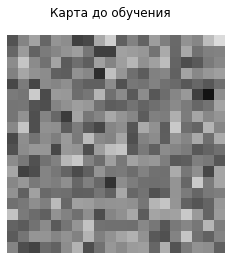

In [40]:
plt.imshow(som_init)
plt.suptitle('Карта до обучения')
plt.axis('off')

In [41]:
def eta(t, eta_0 = 0.1, a = 5e-04): # обучающий сомножитель
    return eta_0 * np.exp(-a * t)

def sigma(t, sigma_0 = 20, b = 1.3e-03): # функция соседства
    return sigma_0 * np.exp(-b * t)

def h(t, rho): # плотность обучения
    return np.exp(- (rho ** 2) / (2 * sigma(t)) )

In [42]:
def rho(m1, m2): # расстояние между двумя нейронами на карте
    return np.sqrt((m1[0] - m2[0]) ** 2 + (m1[1] - m2[0]) ** 2)

In [43]:
def SOM_learn(w_k, som, data, t_max = 1000, N = 20):
    som_maps = [] # в этот список будем складывать виды карт на каждой сотой итерации
    n = len(data[0])
    
    for t in range(1, t_max + 1):
        i = np.random.choice(n)
        x = np.copy(data[i]) # выбираем случайный вектор из обучающей выборки
        
        ind = findBMU(w_k, x) # находим нейрон, наиболее близкий к этому вектору
        best = divmod(ind, N) # находим его расположение на карте
        
        for m in range(N * N): # для всех остальных нейронов
            tmp = divmod(m, N) # находим их расположение на карте
            
            w_k[m] += eta(t) * h(t, rho(best, tmp)) * (x - w_k[m]) # корректируем веса, согласно формуле
            
        # на каждой сотой итерации рисуем карту
        if not t % 100:
            for m in range(N * N):
                avg = np.mean(w_k[m]) # вычисляем среднее значение полученных весов для окраски 
                dm = divmod(m, N)
                som[dm[0], dm[1]] = avg * np.array([255, 255, 255])
            
            som_maps.append(np.copy(som))
    
    return w_k, som_maps,

In [44]:
w_k, maps = SOM_learn(w_k_init, som_init, data)

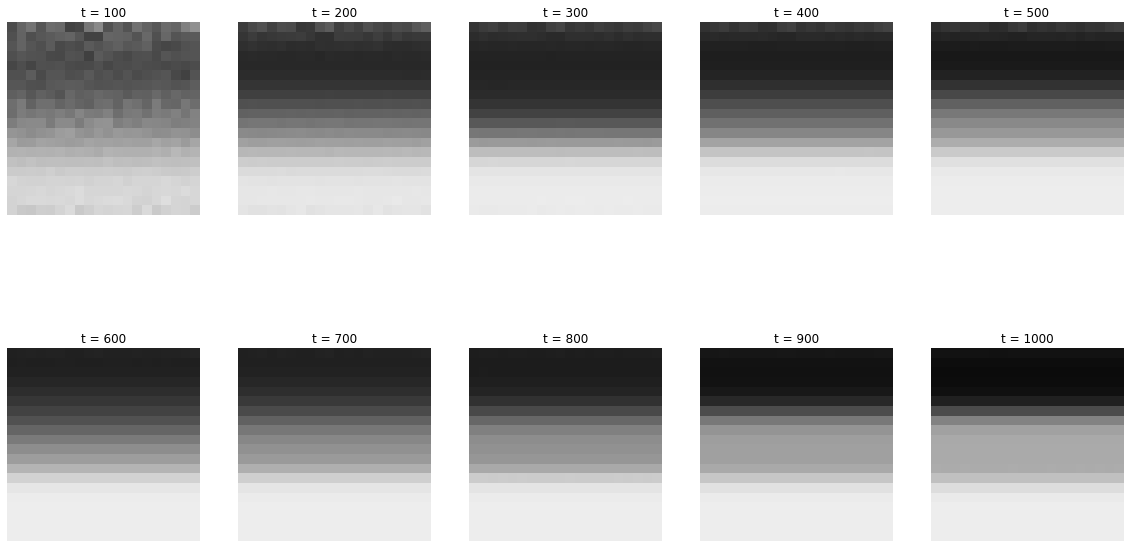

In [45]:
# отобразим изменения карт
f = plt.figure(figsize=(20, 11))
for i in range(2):
    for j in range(5):
        sp = f.add_subplot(2, 5, j + 1 + i * 5)
        sp.axis('Off')
        sp.set_title(f"t = {100 * (i * 5 + j + 1)}")
        plt.imshow(maps[i * 5 + j])
plt.show()

In [52]:
# примеры распознанных предприятий
# 8 - средняя, 2 - крупная, 0 - гигантская
examples = np.array( [ np.copy(data[8]) , np.copy(data[2]) , np.copy(data[0]) ] )

In [53]:
# отметим их на карте
som_map = np.copy(maps[-1])
colors = np.array([[255, 0, 0], [0, 255, 0], [0, 0, 255]]) # R - средние, G - крупные, B - гигантские
for i, x in enumerate(examples):
    ind = findBMU(w_k, x)
    dm = divmod(ind, 20)
    som_map[dm[0], dm[1]] = colors[i]

(-0.5, 19.5, 19.5, -0.5)

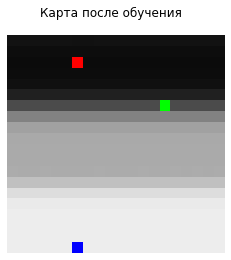

In [54]:
plt.imshow(som_map)
plt.suptitle('Карта после обучения')
plt.axis('off')